In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

water_data = pd.read_csv("./data/dataset_parameters.csv", delimiter=" ") #delimiterはデータセットの列を区切るための文字の指定。

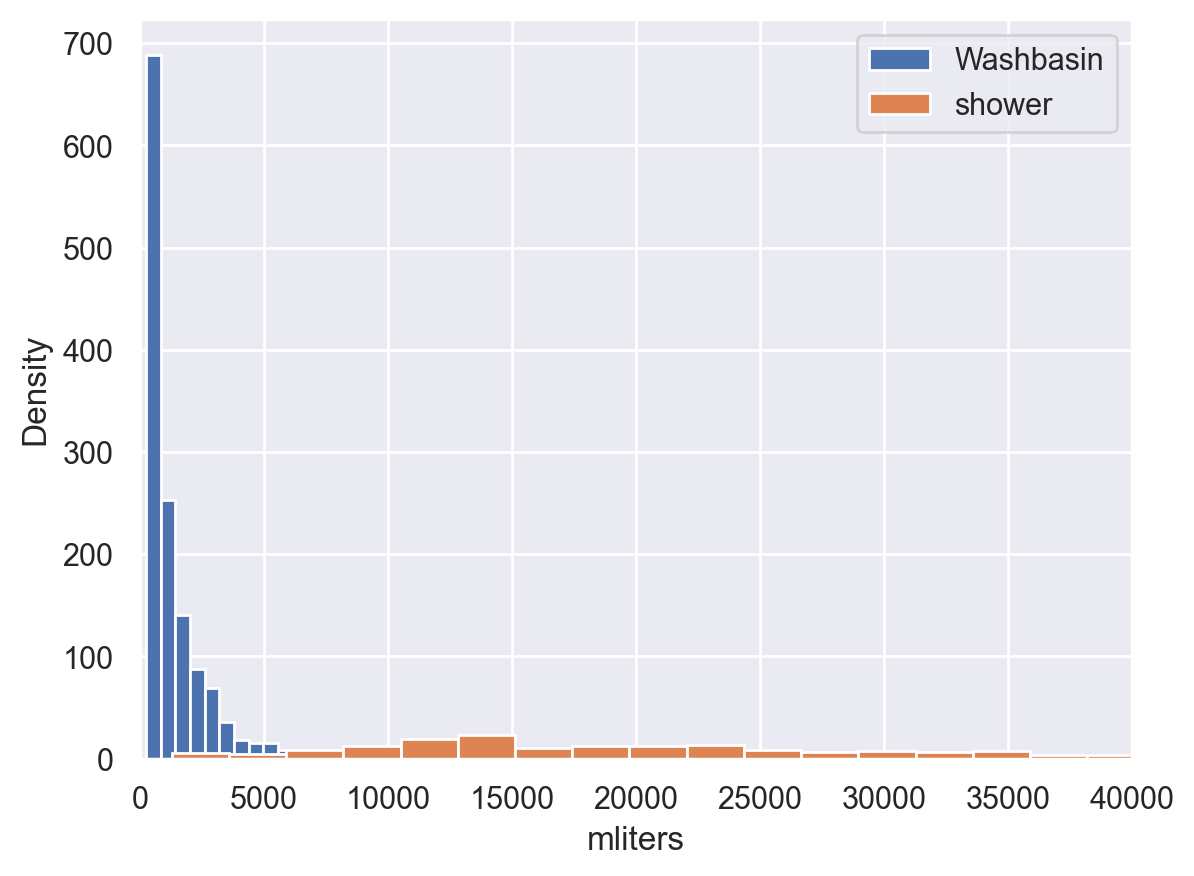

In [2]:
# washbasin VS shower

# fixtureのカラムがwashbasinのものをヒストグラム化
water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)

# fixtureのカラムがshowerのものをヒストグラム化
water_data.loc[water_data["fixture"] == "shower", "liters"].hist(bins=40,
    label="shower"
)


plt.xlim(0,40000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend()
plt.show()

In [3]:
water_data.head()

,duration,liters,month,hour,day,max_flow,fixture,num_fixture,av_flow_rate,sec_from_midnight
0,1290,30479,10,8,1,27,bidet,1,23.627132,23339
1,261,9502,3,18,6,51,bidet,1,36.406130,62624
2,183,8869,10,0,4,67,bidet,1,48.464481,80073
3,103,8126,8,18,3,90,bidet,1,78.893204,60721
4,140,7796,4,2,5,148,bidet,1,55.685714,2342


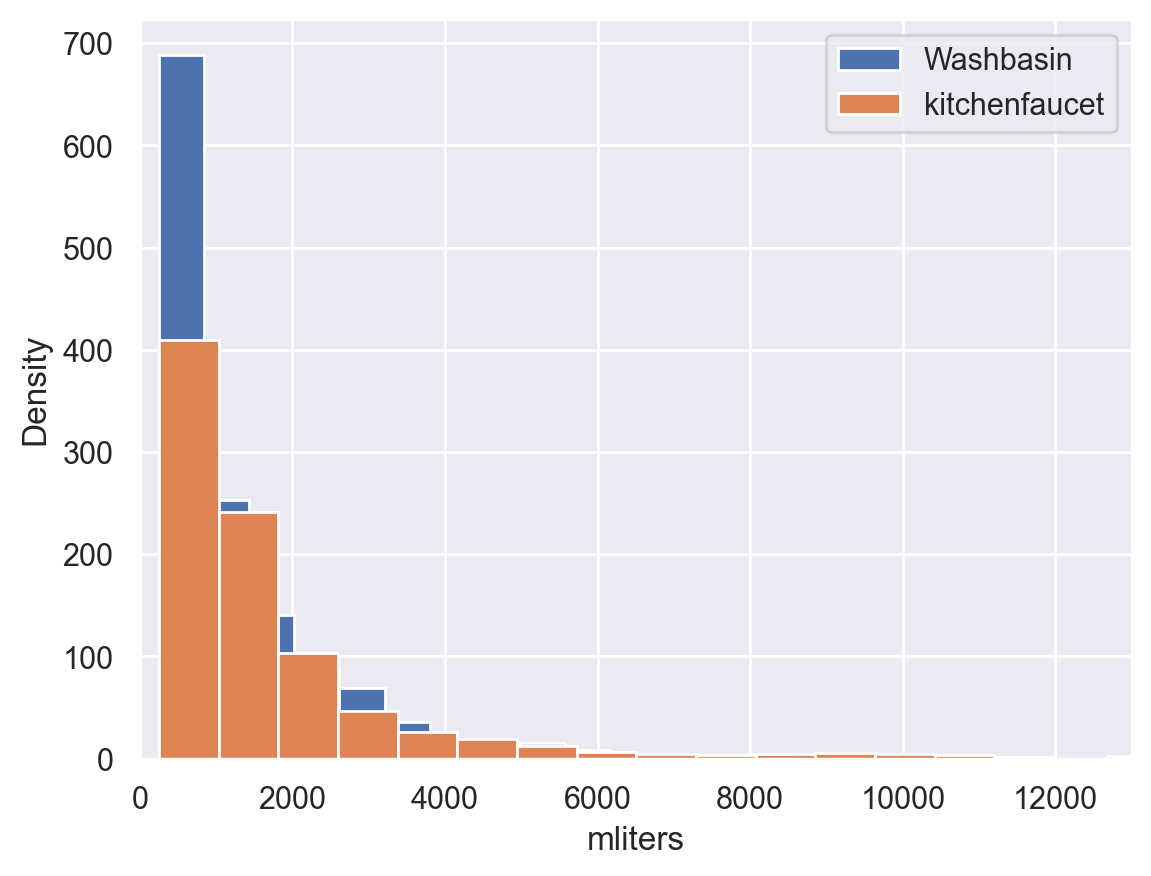

In [4]:
# washbasin VS kitchenfaucet

plt.figure()
water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)
water_data.loc[water_data["fixture"] == "kitchenfaucet", "liters"].hist(bins=40,
    label="kitchenfaucet"
)


plt.xlim(0,13000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend()
plt.show()

In [5]:
# Bootstrapping
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    
    # パーセンタイルを計算して信頼区間の境界を生成します。
    # 100 * alpha / 2.0 は下位パーセンタイル（例：alpha=0.05の場合は2.5%）、
    # 100 * (1 - alpha / 2.0) は上位パーセンタイル（例：alpha=0.05の場合は97.5%）を表します。
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    
    # 計算された信頼区間の境界（下限と上限）を返します。
    return boundaries

In [6]:
wb_liters = water_data.loc[
    water_data["fixture"] == "washbasin", "liters"
].values
sample_wb = get_bootstrap_samples(wb_liters, 5000)

kit_liters = water_data.loc[
    water_data["fixture"] == "kitchenfaucet", "liters"
].values
sample_kit = get_bootstrap_samples(kit_liters, 5000)

show_liters = water_data.loc[
    water_data["fixture"] == "shower", "liters"
].values
sample_show = get_bootstrap_samples(show_liters, 5000)

In [7]:



# Save the data about the washbasin and Kitchen faucet to split the dataset
wb_liters = water_data.loc[
    water_data["fixture"] == "washbasin", "liters"
].values
kit_liters = water_data.loc[
    water_data["fixture"] == "kitchenfaucet", "liters"
].values

show_liters = water_data.loc[
    water_data["fixture"] == "shower", "liters"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
wb_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(wb_liters, 5000)
]
kit_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(kit_liters, 5000)
]

show_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(show_liters, 5000)
]

# Print the resulting interval estimates
print(
    "mliters consumed by washbasin: mean interval", stat_intervals(wb_liters_mean_scores, 0.05)
)
print(
    "mliters consumed by kitchenfaucet: mean interval", stat_intervals(kit_liters_mean_scores, 0.05)
)

print(
    "mliters consumed by shower: mean interval", stat_intervals(show_liters_mean_scores, 0.05)
)

mliters consumed by washbasin: mean interval [1343.74715657 1547.52730798]
mliters consumed by kitchenfaucet: mean interval [1644.55840782 1953.05427374]
mliters consumed by shower: mean interval [20094.71101695 24334.08135593]


⇧これは単に、それぞれの使用用途データ別にBootstrappingして、平均を元に信頼区間を出してるだけ。

/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}

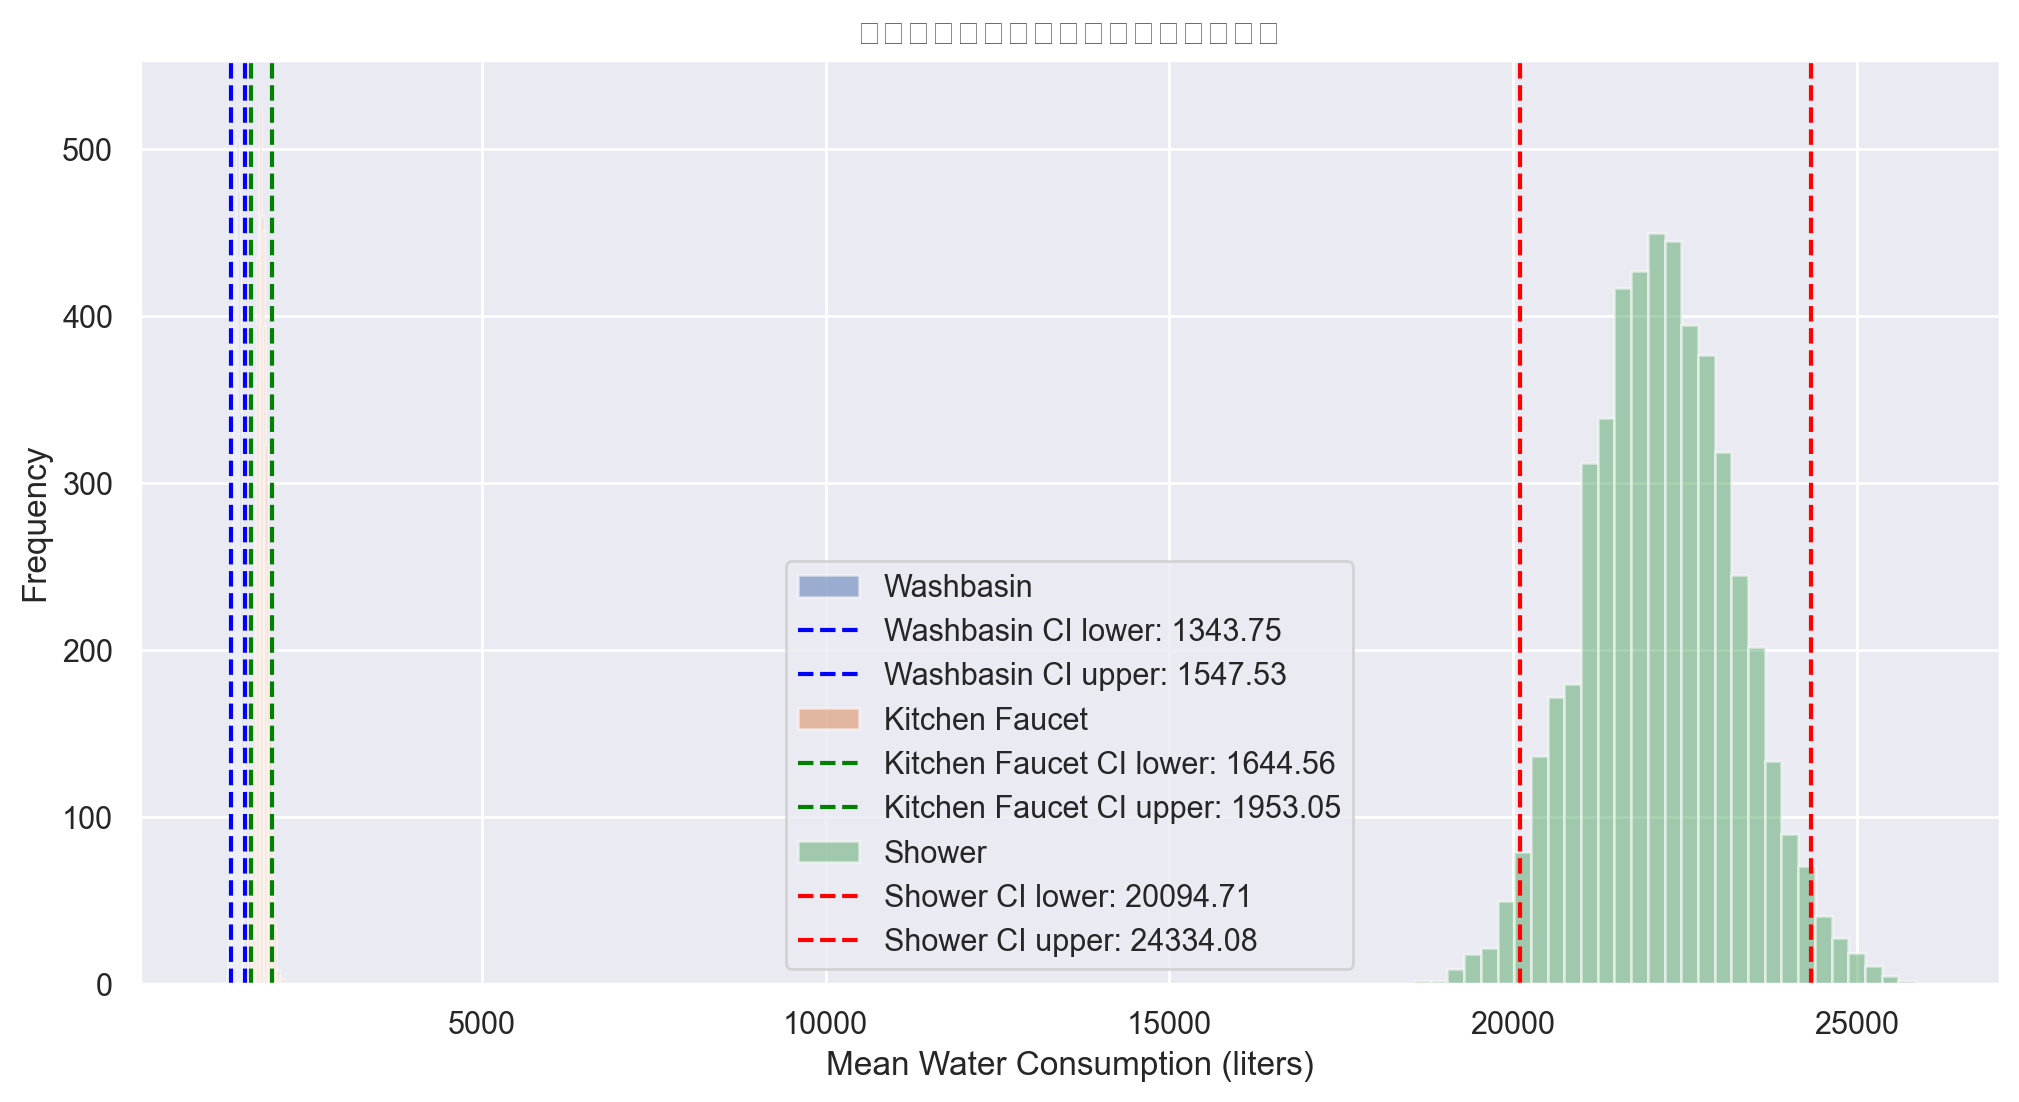

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the functions get_bootstrap_samples and stat_intervals are already defined
# Placeholder for get_bootstrap_samples function
def get_bootstrap_samples(data, n_samples):
    """ Generate bootstrap samples from data."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    return data[indices]

# Placeholder for stat_intervals function
def stat_intervals(statistics, alpha):
    """ Return confidence interval for the given alpha."""
    boundaries = np.percentile(statistics, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries

# Set the seed for reproducibility
np.random.seed(0)

# Bootstrap sampling and mean calculation
wb_liters_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(wb_liters, 5000)]
kit_liters_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(kit_liters, 5000)]
show_liters_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(show_liters, 5000)]

# Calculate confidence intervals
wb_ci = stat_intervals(wb_liters_mean_scores, 0.05)
kit_ci = stat_intervals(kit_liters_mean_scores, 0.05)
show_ci = stat_intervals(show_liters_mean_scores, 0.05)

# Plotting the bootstrap samples and confidence intervals
plt.figure(figsize=(12, 6))

# # Plot for washbasin
# plt.hist(wb_liters_mean_scores, bins=30, alpha=0.5, label='Washbasin')
# plt.axvline(x=wb_ci[0], color='blue', linestyle='--', label=f'Washbasin CI lower: {wb_ci[0]:.2f}')
# plt.axvline(x=wb_ci[1], color='blue', linestyle='--', label=f'Washbasin CI upper: {wb_ci[1]:.2f}')

# # Plot for kitchen faucet
# plt.hist(kit_liters_mean_scores, bins=30, alpha=0.5, label='Kitchen Faucet')
# plt.axvline(x=kit_ci[0], color='green', linestyle='--', label=f'Kitchen Faucet CI lower: {kit_ci[0]:.2f}')
# plt.axvline(x=kit_ci[1], color='green', linestyle='--', label=f'Kitchen Faucet CI upper: {kit_ci[1]:.2f}')

# Plot for shower
plt.hist(show_liters_mean_scores, bins=30, alpha=0.5, label='Shower')
plt.axvline(x=show_ci[0], color='red', linestyle='--', label=f'Shower CI lower: {show_ci[0]:.2f}')
plt.axvline(x=show_ci[1], color='red', linestyle='--', label=f'Shower CI upper: {show_ci[1]:.2f}')

plt.title('ブートストラップによるサンプリング')
plt.xlabel('Mean Water Consumption (liters)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/EL-WaterDemandTS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}

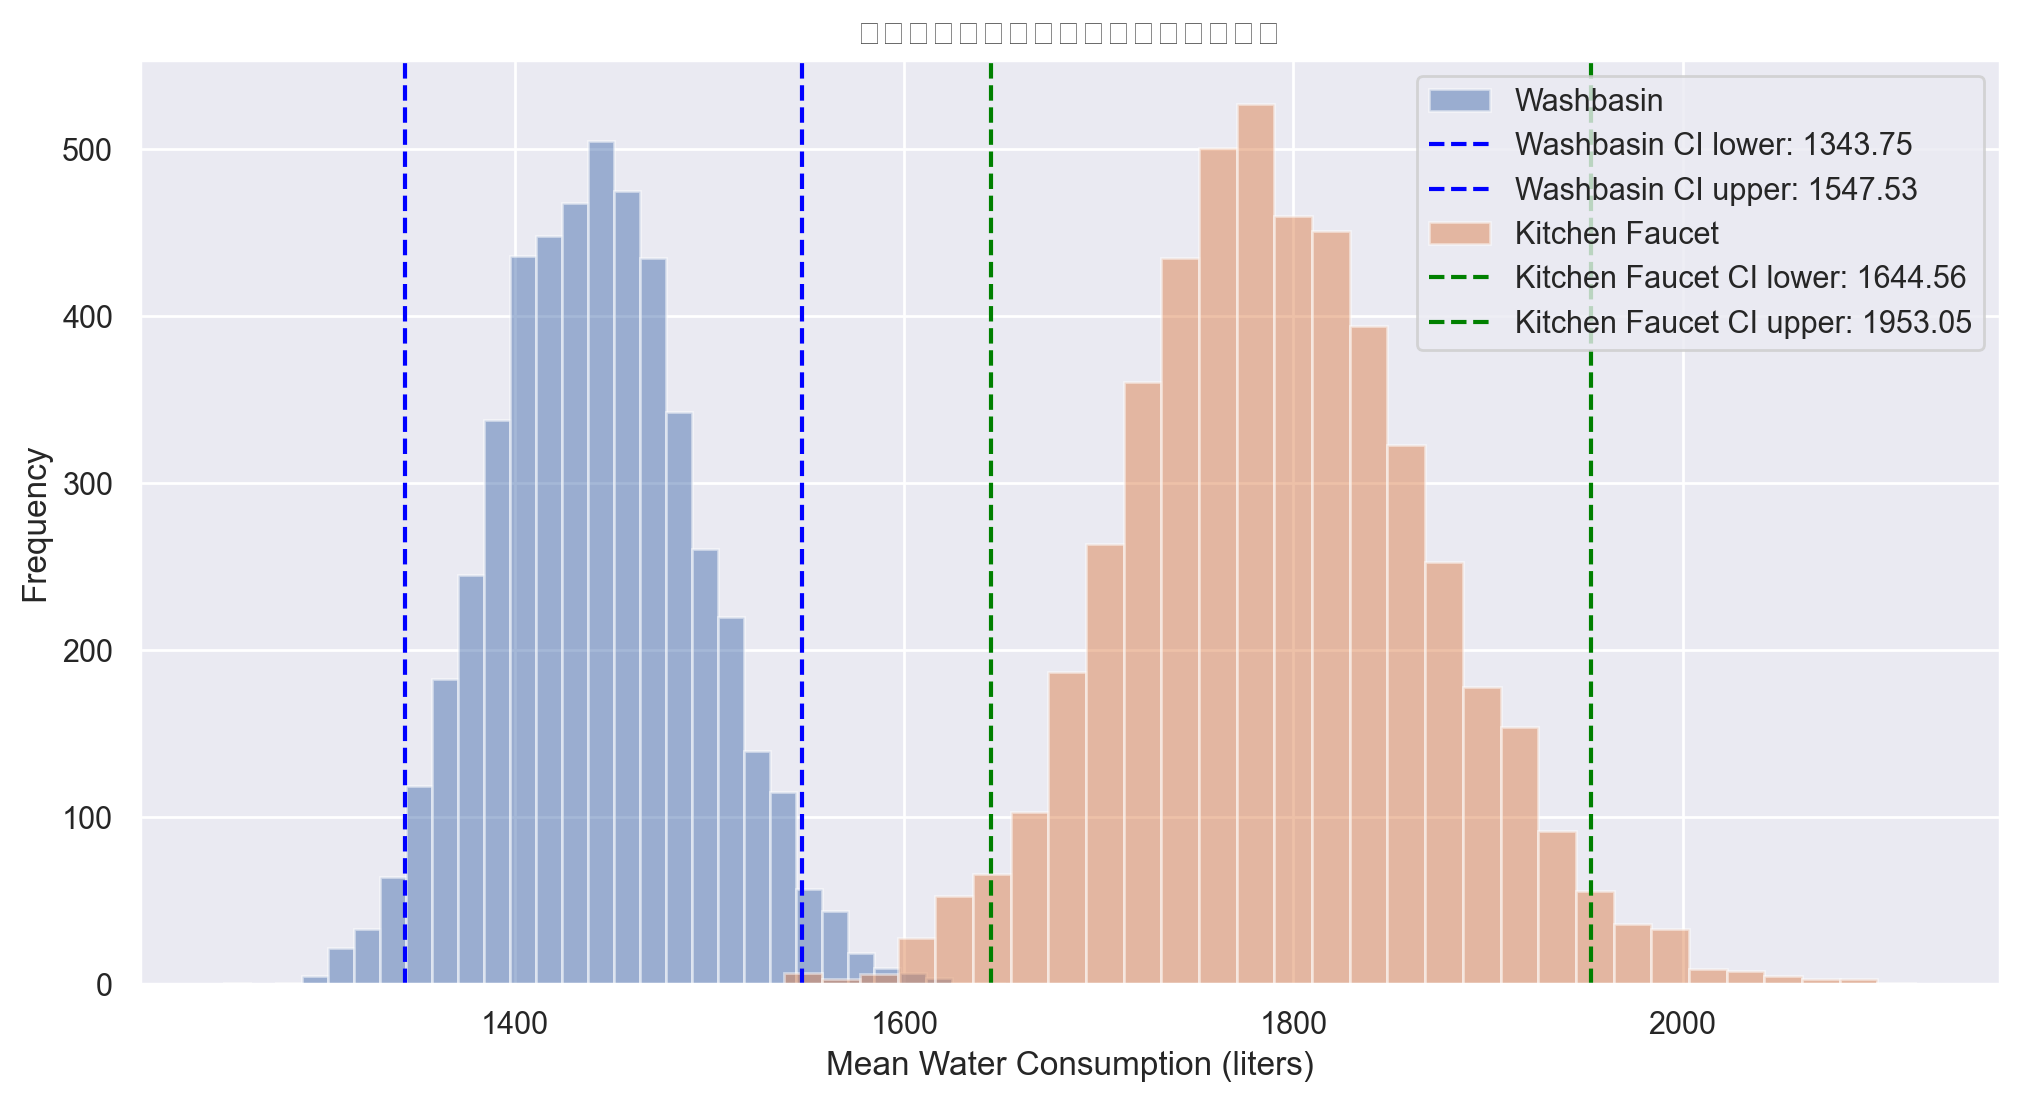

In [12]:
plt.figure(figsize=(12, 6))

# Plot for washbasin
plt.hist(wb_liters_mean_scores, bins=30, alpha=0.5, label='Washbasin')
plt.axvline(x=wb_ci[0], color='blue', linestyle='--', label=f'Washbasin CI lower: {wb_ci[0]:.2f}')
plt.axvline(x=wb_ci[1], color='blue', linestyle='--', label=f'Washbasin CI upper: {wb_ci[1]:.2f}')

# Plot for kitchen faucet
plt.hist(kit_liters_mean_scores, bins=30, alpha=0.5, label='Kitchen Faucet')
plt.axvline(x=kit_ci[0], color='green', linestyle='--', label=f'Kitchen Faucet CI lower: {kit_ci[0]:.2f}')
plt.axvline(x=kit_ci[1], color='green', linestyle='--', label=f'Kitchen Faucet CI upper: {kit_ci[1]:.2f}')

plt.title('ブートストラップによるサンプリング')
plt.xlabel('Mean Water Consumption (liters)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
